In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import re

In [21]:
#LOAD THE DATASETS
true_df = pd.read_csv(r"M:\RESHMA\otherMLs\News _dataset\True.csv")
fake_df = pd.read_csv(r"M:\RESHMA\otherMLs\News _dataset\Fake.csv")

#GIVE LABELS 
true_df["label"] = 1 #real news
fake_df["label"] = 0 #fake news

#COMBINE DATASETS
df = pd.concat([true_df, fake_df], axis=0)
df = df.sample(frac=1).reset_index(drop=True) #for shuffling
df.head()





,title,text,subject,date,label
0,The Court Case Against the ‘Travel Ban’ Execut...,21st Century Wire says The legal battle is wag...,US_News,"February 6, 2017",0
1,Republican senator to propose eliminating mand...,WASHINGTON (Reuters) - U.S. Republican Senator...,politicsNews,"January 15, 2017",1
2,Trump says will speak with China's Xi on North...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"August 11, 2017",1
3,Trump Has Meltdown Over Kasich And Cruz Joini...,The Republican Party is filled with even more ...,News,"April 25, 2016",0
4,Senate to hold vote on stopping gun control bi...,WASHINGTON (Reuters) - U.S. Senate Republicans...,politicsNews,"June 23, 2016",1


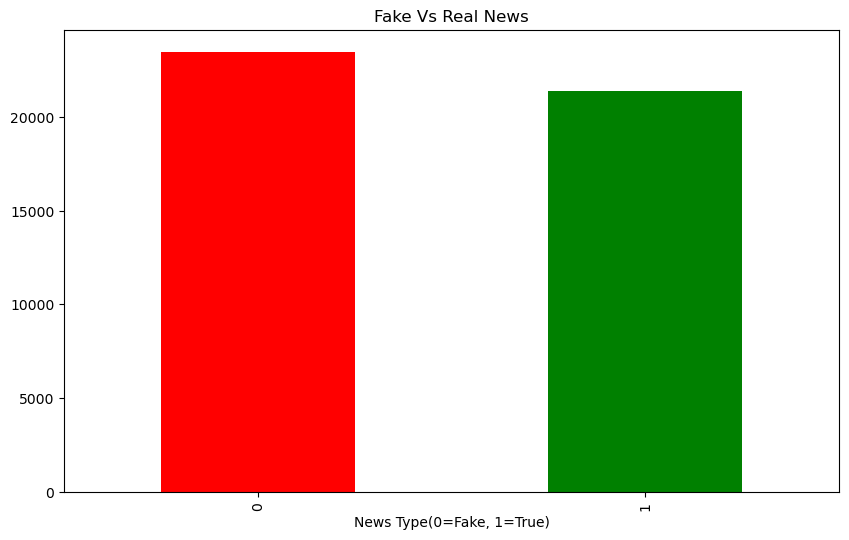

In [22]:
#Distribution of real and fake news
plt.figure(figsize=(10,6))
news_counts= df['label'].value_counts().plot(kind='bar',color=['red','green'])
plt.xlabel('News Type(0=Fake, 1=True)') 
plt.ylabel= 'count'
plt.title("Fake Vs Real News")
plt.show()

In [23]:
#data combining content and title for which we import re
df['content'] = df['title']+""+df['text']

#data cleaning
df['content'] = df['content'].apply(lambda x:re.sub(r'[^a-zA-Z]','',x.lower()))

In [24]:
#Feature Extraction
X = df['content']
y = df['label']


In [25]:
#TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_tfidf = vectorizer.fit_transform(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [27]:
nb = MultinomialNB()#Naive Bayes model
nb.fit(X_train, y_train)

MultinomialNB()

In [28]:
y_pred_nb = nb.predict(X_test)

In [29]:
#Decision Tree
dt = DecisionTreeClassifier(max_depth=20, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, random_state=42)

In [30]:
y_pred_dt = dt.predict(X_test)

In [31]:
#Model evaluation
print("Naive Bayes model")
print(classification_report(y_test, y_pred_nb))
print("Accuracy:",accuracy_score(y_test, y_pred_nb))

Naive Bayes model
              precision    recall  f1-score   support

           0       0.53      1.00      0.69      4680
           1       1.00      0.03      0.06      4300

    accuracy                           0.54      8980
   macro avg       0.76      0.52      0.38      8980
weighted avg       0.75      0.54      0.39      8980

Accuracy: 0.5365256124721604


In [32]:
print("Decision Tree model:")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree model:
              precision    recall  f1-score   support

           0       0.52      1.00      0.69      4680
           1       1.00      0.00      0.00      4300

    accuracy                           0.52      8980
   macro avg       0.76      0.50      0.34      8980
weighted avg       0.75      0.52      0.36      8980

Accuracy: 0.5217149220489977


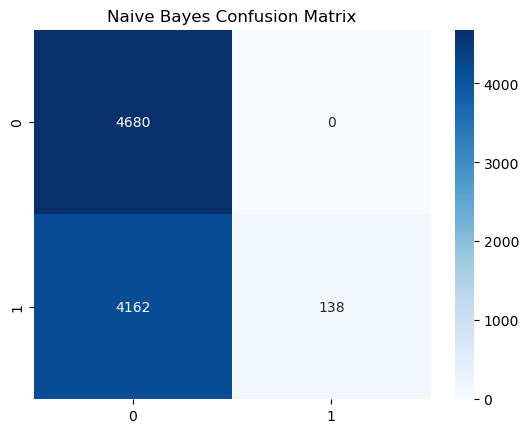

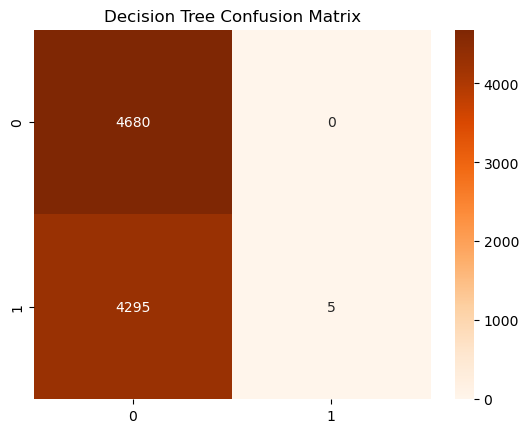

In [33]:
#Comparison of confusion matrix of both
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt="d", cmap="Blues")
plt.title("Naive Bayes Confusion Matrix")
plt.show()

sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d", cmap="Oranges")
plt.title("Decision Tree Confusion Matrix")
plt.show()


In [34]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [35]:
#Cross Validation on each model
nb= MultinomialNB()
scores_nb= cross_val_score(nb, X_tfidf, y, cv=cv, scoring='accuracy')
print("Naive Bayes Cross validation scores:", scores_nb)
print("Average accuracy:", scores_nb.mean())

Naive Bayes Cross validation scores: [0.54075724 0.5389755  0.54097996 0.53925827 0.54048335]
Average accuracy: 0.5400908628423015


In [36]:
dt = DecisionTrreeClassifier(max_depth=20, random_state=42)
scores_dt = cross_val_score(dt, X_tfidf, y, cv=cv, scoring='accuracy')
print("Decision Tree Cross Validation:", scores_dt)
print("Average accuracy:",score_dt.mean())

NameError: name 'DecisionTrreeClassifier' is not defined